In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.svm import SVC, LinearSVC


### 生成非圓形分布的 2D 數據集

In [2]:
X, Y = make_moons(n_samples=300, noise=0.2, random_state=0)

### SVM 模型

In [3]:
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X, Y)

SVC()

### 創建網格來繪製決策邊界

In [4]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

### 創建 3D 圖

C:\Users\danny\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


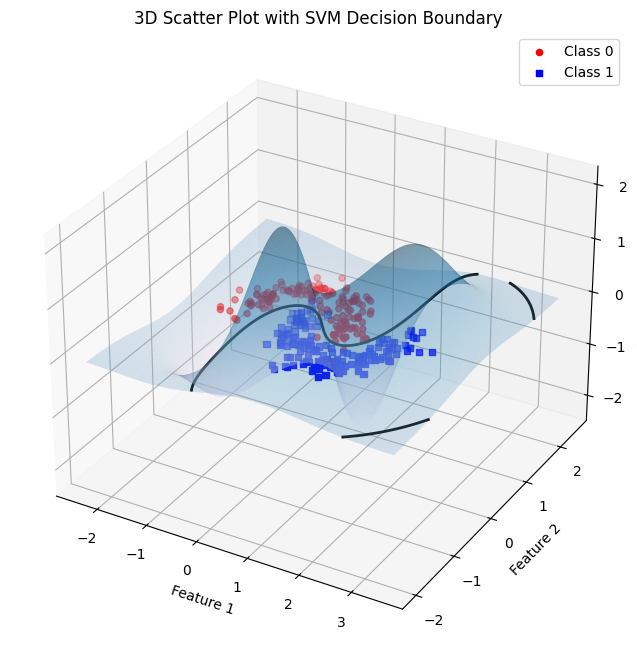

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 繪製數據點
ax.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], 0, color='red', marker='o', label='Class 0')
ax.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], 0, color='blue', marker='s', label='Class 1')

# 繪製決策邊界和間隔
ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.3, cmap=plt.cm.PuBu)
ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', offset=0)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Decision Function')
ax.set_title('3D Scatter Plot with SVM Decision Boundary')
ax.legend()

plt.show()

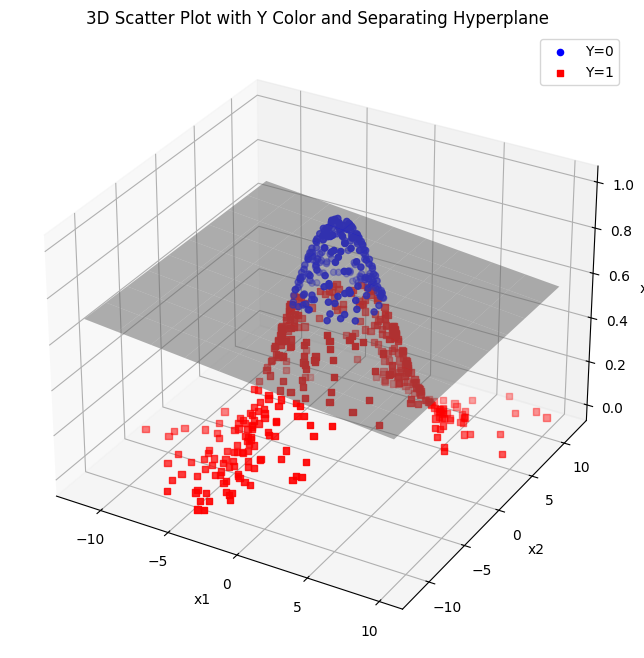

In [12]:
np.random.seed(12)  # Set seed for reproducibility
num_points = 600  # Number of points to generate
mean = 0  # Mean of the normal distribution
variance = 10  # Variance of the normal distribution

x1 = np.random.normal(mean, np.sqrt(variance), num_points)
x2 = 0.8 * x1 + np.random.normal(mean, np.sqrt(variance), num_points)
# Calculate distances from the origin
distances = np.sqrt(x1**2 + x2**2)

# Assign labels Y=0 for points within distance 4, Y=1 for the rest
Y = np.where(distances < 3, 0, 1)

# Step 2: Calculate x3 as a Gaussian function of x1 and x2
def gaussian_function(x1, x2):
    return np.exp(-0.05 * (x1**2 + x2**2))

x3 = gaussian_function(x1, x2)

# Step 3: Train a LinearSVC to find a separating hyperplane
X = np.column_stack((x1, x2, x3))
clf = LinearSVC(random_state=0, max_iter=10000)
clf.fit(X, Y)
coef = clf.coef_[0]
intercept = clf.intercept_

fig = plt.figure(figsize=(10, 8))  # Create a figure for the plot
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot for points with label Y=0
ax.scatter(x1[Y==0], x2[Y==0], x3[Y==0], c='blue', marker='o', label='Y=0')
# Scatter plot for points with label Y=1
ax.scatter(x1[Y==1], x2[Y==1], x3[Y==1], c='red', marker='s', label='Y=1')

# Set labels and title for the plot
ax.set_xlabel('x1')  # Label for x-axis
ax.set_ylabel('x2')  # Label for y-axis
ax.set_zlabel('x3')  # Label for z-axis
ax.set_title('3D Scatter Plot with Y Color and Separating Hyperplane')  # Title of the plot
ax.legend()  # Show legend

# Create a meshgrid to plot the separating hyperplane
xx, yy = np.meshgrid(np.linspace(min(x1), max(x1), 10),
                     np.linspace(min(x2), max(x2), 10))

# Calculate zz values for the separating hyperplane
zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]

# Plot the separating hyperplane
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)  # Plot the hyperplane surface

# Show the plot
plt.show()  # Display the final plot